# HW5 Assignment 1:
# Based on work by author: FBB
# Completed by Jonathan Toy @jontoy

    
    In this notebook we will be testing if the distribution of ages follow some of the common models 
    
    We will use 2 tests to do this: KS and AD. 
    
    For the KS test, which for a specified comparison distribution tests the null hypothesis that the underlying 
    distribution for the ages of citibike riders is exactly the comparison distribution, we will separately
    be using gaussian and chi squared distributions with parameters estimated from the data as comparison 
    distributions.
    
    For the AD test, which for a specified family of comparison distributions tests the null hypothesis that the 
    underlying distribution for the ages of citibike riders is a member of that family of distributions, we will 
    separately be using the gaussian and exponential families of distributions for comparison.
    

In [11]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


### For this analysis we will be using a reasonable significance threshold of $\alpha = 0.05$. 

### In order to reduce systematic errors, we will be reading in data from both January 1015 and June 2015 and combining the data sets.

In [90]:
datestring1 = '201501'
getCitiBikeCSV(datestring1)
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')

datestring2 = '201506'
getCitiBikeCSV(datestring2)
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

#df1 = pd.read_csv("201501-citibike-tripdata.csv")
#df2 = pd.read_csv("201506-citibike-tripdata.csv")

df = pd.concat([df1,df2],ignore_index=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [91]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

# Extract age

In [115]:
age = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]
age = age.dropna()
age.head()

0    55.0
1    52.0
2    41.0
3    46.0
4    38.0
Name: birth year, dtype: float64

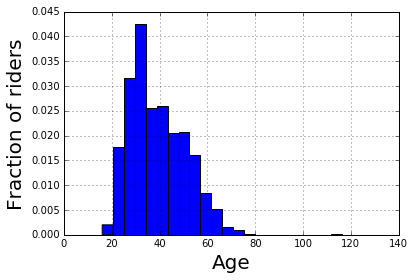

In [116]:
ax = age.hist(bins=25,normed=True)

ax.set_ylabel ("Fraction of riders", fontsize=20)
ax.set_xlabel ("Age", fontsize=20)



### Figure 1: Distibution of ages for citibike riders. Note that the distribution does not look symmetric and skews to the left.

In [117]:
# extract an array of values from the series to use for testing
age_val = age.values

In [118]:
scipy.stats.kstest(age_val, 'norm', args=(age.mean(),age.std()))

KstestResult(statistic=0.099176792543443637, pvalue=0.0)

##### If we assume the target distribution is normal with mean and variance equal to the sample mean and variance (which would be our best estimator for the true mean and variance) and run the K-S test we get a test statistic that corresponds to a p-value of approximately 0. As our critical value $\alpha$ is 0.05, our p-value is below the critical threshold, and thus we reject the null hypothesis and conclude that the riders' ages did not come from an normal distribution.

In [119]:
scipy.stats.kstest(age_val, 'chi2', args = (age.mean(), 0, 1))

KstestResult(statistic=0.13960373143272511, pvalue=0.0)

##### If we assume the target distribution is chi squared with mean (and degrees of freedom) equal to the sample mean (which would be our best estimator for the true mean) and run the K-S test we again get a test statistic that corresponds to a p-value of approximately 0. As our critical value $\alpha$ is 0.05, our p-value is below the critical threshold, and thus we reject the null hypothesis and conclude that the riders' ages did not come from an chi squared distribution.

##### It is worth noting that our distribution has zero entries for ages 0-15, which may be significantly impairing its fit to many of the common distributions (gaussian, chi squared, exponential, etc.).

In [120]:
scipy.stats.anderson(age_val, dist='norm')

AndersonResult(statistic=13976.967560137156, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

##### If we assume the target distribution is normal and run the Anderson-Darling test we get a test statistic of 13977. As our critical value $\alpha$ is 0.05, our critical threshold is 0.787. As our test statistic is far beyond the critical threshold, we reject the null hypothesis and conclude that the riders' ages did not come from an normal distribution.

In [121]:
scipy.stats.anderson(age_val, dist='expon')

AndersonResult(statistic=255570.09667211305, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

##### If we assume the target distribution is exponential and run the Anderson-Darling test we get a test statistic of 255570. As our critical value $\alpha$ of 0.05, our critical threshold is 1.341. As our test statistic is far beyond the critical threshold, we reject the null hypothesis and conclude that the riders' ages did not come from an exponential distribution.